In [122]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

In [123]:
#import data set
df = pd.read_csv('Sentiment_Data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Review     2000 non-null   object 
 1   Rating     2000 non-null   float64
 2   Sentiment  2000 non-null   object 
dtypes: float64(1), object(2)
memory usage: 47.0+ KB


In [124]:
df = df.drop(['Rating'], axis=1)

In [125]:
df['Sentiment'].value_counts()

Sentiment
Positive    1840
Negative     160
Name: count, dtype: int64

<BarContainer object of 2 artists>

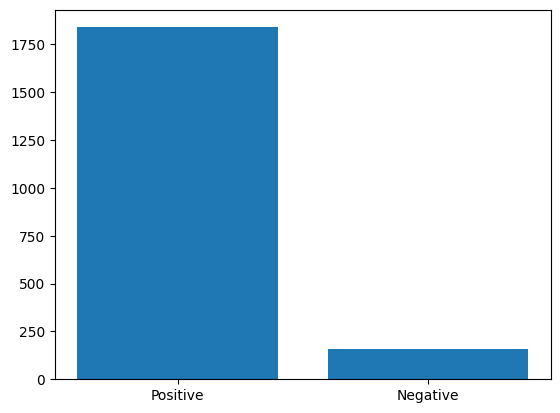

In [126]:
plt.bar(df['Sentiment'].value_counts().index, df['Sentiment'].value_counts().values)

In [127]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

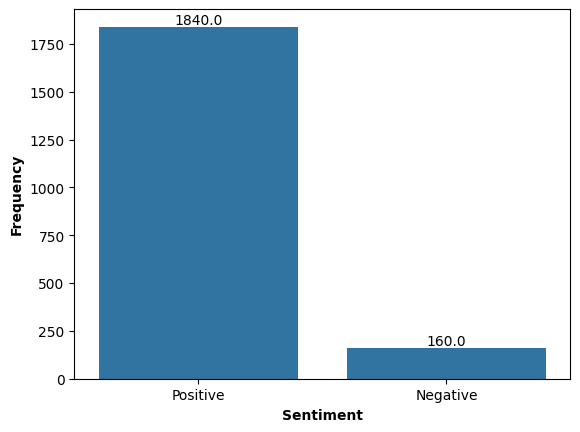

In [128]:
ax = sns.countplot(x='Sentiment', data=df)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.xlabel("Sentiment", fontweight = 'bold')
plt.ylabel("Frequency", fontweight = 'bold')
plt.show()

In [129]:
vocab_size = 1000
embeding_dim = 16
max_length = 80
trunc_type = 'post'
padding_type = 'post'
OOV_tok = '<OOV>'

In [130]:
sentences = df['Review']
labels = df['Sentiment']

sentences_train, sentences_test, labels_train, labels_test = train_test_split(
    sentences, labels, train_size=0.8, shuffle=False
)
sentences_val = sentences_test
check = sentences_val

In [131]:
tokenizer = Tokenizer(
    num_words = vocab_size,
    oov_token = OOV_tok
)

tokenizer.fit_on_texts(sentences_train)
word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(sentences_train)
sentences_train = pad_sequences(
    train_sequences,
    maxlen = max_length,
    truncating = trunc_type,
    padding = padding_type
)

test_sequences = tokenizer.texts_to_sequences(sentences_test)
sentences_test = pad_sequences(
    test_sequences,
    maxlen = max_length,
    truncating = trunc_type,
    padding = padding_type
)

label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)
labels_train = np.array(label_tokenizer.texts_to_sequences(labels_train))
labels_test = np.array(label_tokenizer.texts_to_sequences(labels_test))


In [132]:
model_sentiment_analysis = tf.keras.Sequential([tf.keras.layers.Embedding(vocab_size, embeding_dim, input_length=max_length),
                                                tf.keras.layers.GlobalAveragePooling1D(),
                                                tf.keras.layers.Dense(24, activation='relu'),
                                                tf.keras.layers.Dense(12, activation='relu'),
                                                tf.keras.layers.Dense(6, activation='sigmoid')
])

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs.get('accuracy') is not None and logs.get('val_accuracy') is not None:
            if logs.get('accuracy') > 0.85 and logs.get('val_accuracy') > 0.85:
                self.model.stop_training = True
                
callbacks = myCallback()

c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [133]:
model_sentiment_analysis.compile(loss='sparse_categorical_crossentropy',
                                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                                 metrics=['accuracy']
                                 )

model_sentiment_analysis.fit(sentences_train,
                             labels_train,
                             epochs=10,
                             validation_data=(sentences_test, labels_test),
                            #  callbacks=callbacks
                             )

Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8495 - loss: 0.8640 - val_accuracy: 1.0000 - val_loss: 0.0055
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9992 - loss: 0.0055 - val_accuracy: 1.0000 - val_loss: 1.3590e-04
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9999 - loss: 8.5502e-04 - val_accuracy: 1.0000 - val_loss: 1.3059e-04
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 1.0000 - val_loss: 8.5221e-05
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9997 - loss: 3.8884e-04 - val_accuracy: 1.0000 - val_loss: 1.4568e-04
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 1.8342e-04 - val_accuracy: 1.0000 - val_loss: 5.1583e-05
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 5.9150e-05 - val_accuracy: 1.0000 - val_loss: 3.9777e-05
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 4

In [134]:
model_sentiment_analysis.save('sentiment_analysis.h5')

In [135]:
model = tf.keras.models.load_model('sentiment_analysis.h5')

In [136]:
sequences_val = tokenizer.texts_to_sequences(sentences_val)
sentences_val = pad_sequences(
    sequences_val,
    maxlen = max_length,
    truncating = trunc_type,
    padding = padding_type
)

In [137]:
preditions = model.predict(sentences_val)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


In [138]:
predicted_class = np.argmax(preditions, axis=1)


In [139]:
predicted_labels = label_tokenizer.sequences_to_texts(predicted_class.reshape(-1,1))

In [140]:
labels_test = label_tokenizer.sequences_to_texts(labels_test.reshape(-1,1))


In [146]:
df_check = pd.DataFrame({'Review': check, 'Predicted Sentiment': predicted_labels, 'Actual Sentiment': labels_test})
df_check['Predicted Sentiment'].value_counts()

Predicted Sentiment
positive    368
negative     32
Name: count, dtype: int64

In [147]:
df_check['Actual Sentiment'].value_counts()

Actual Sentiment
positive    368
negative     32
Name: count, dtype: int64